In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
control_df = pd.read_csv('/content/control_group.csv', delimiter=';')
test_df = pd.read_csv('/content/test_group.csv', delimiter=';')

In [3]:
control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [5]:
def clean_column_names (df):
  new_columns = []
  for col in df.columns:
    col = col.replace('# of ', '').replace('[USD]', '').strip().replace(' ', '_')
    new_columns.append(col)
  df.columns = new_columns
  return df
control_df = clean_column_names(control_df)
test_df = clean_column_names(test_df)

In [6]:
control_df.head(10)

,Campaign_Name,Date,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [7]:
test_df.head(10)

,Campaign_Name,Date,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


In [8]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Campaign_Name   30 non-null     object 
 1   Date            30 non-null     object 
 2   Spend           30 non-null     int64  
 3   Impressions     29 non-null     float64
 4   Reach           29 non-null     float64
 5   Website_Clicks  29 non-null     float64
 6   Searches        29 non-null     float64
 7   View_Content    29 non-null     float64
 8   Add_to_Cart     29 non-null     float64
 9   Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Campaign_Name   30 non-null     object
 1   Date            30 non-null     object
 2   Spend           30 non-null     int64 
 3   Impressions     30 non-null     int64 
 4   Reach           30 non-null     int64 
 5   Website_Clicks  30 non-null     int64 
 6   Searches        30 non-null     int64 
 7   View_Content    30 non-null     int64 
 8   Add_to_Cart     30 non-null     int64 
 9   Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [10]:
control_df.isnull().sum()


,0
Campaign_Name,0
Date,0
Spend,0
Impressions,1
Reach,1
Website_Clicks,1
Searches,1
View_Content,1
Add_to_Cart,1
Purchase,1


In [11]:
test_df.isnull().sum()

,0
Campaign_Name,0
Date,0
Spend,0
Impressions,0
Reach,0
Website_Clicks,0
Searches,0
View_Content,0
Add_to_Cart,0
Purchase,0


In [12]:
control_df.dropna(inplace=True)


In [13]:
control_df.describe()

,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2304.068966,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,363.534822,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1962.000000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2319.000000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2544.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [14]:
test_df.describe()

,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


--- Control Group Descriptive Statistics ---
                                Date        Spend    Impressions  \
count                             29    29.000000      29.000000   
mean   2019-08-15 20:41:22.758620672  2304.068966  109559.758621   
min              2019-08-01 00:00:00  1757.000000   71274.000000   
25%              2019-08-09 00:00:00  1962.000000   92029.000000   
50%              2019-08-16 00:00:00  2319.000000  113430.000000   
75%              2019-08-23 00:00:00  2544.000000  121332.000000   
max              2019-08-30 00:00:00  3083.000000  145248.000000   
std                              NaN   363.534822   21688.922908   

               Reach  Website_Clicks     Searches  View_Content  Add_to_Cart  \
count      29.000000       29.000000    29.000000     29.000000    29.000000   
mean    88844.931034     5320.793103  2221.310345   1943.793103  1300.000000   
min     42859.000000     2277.000000  1001.000000    848.000000   442.000000   
25%     74192.000000  

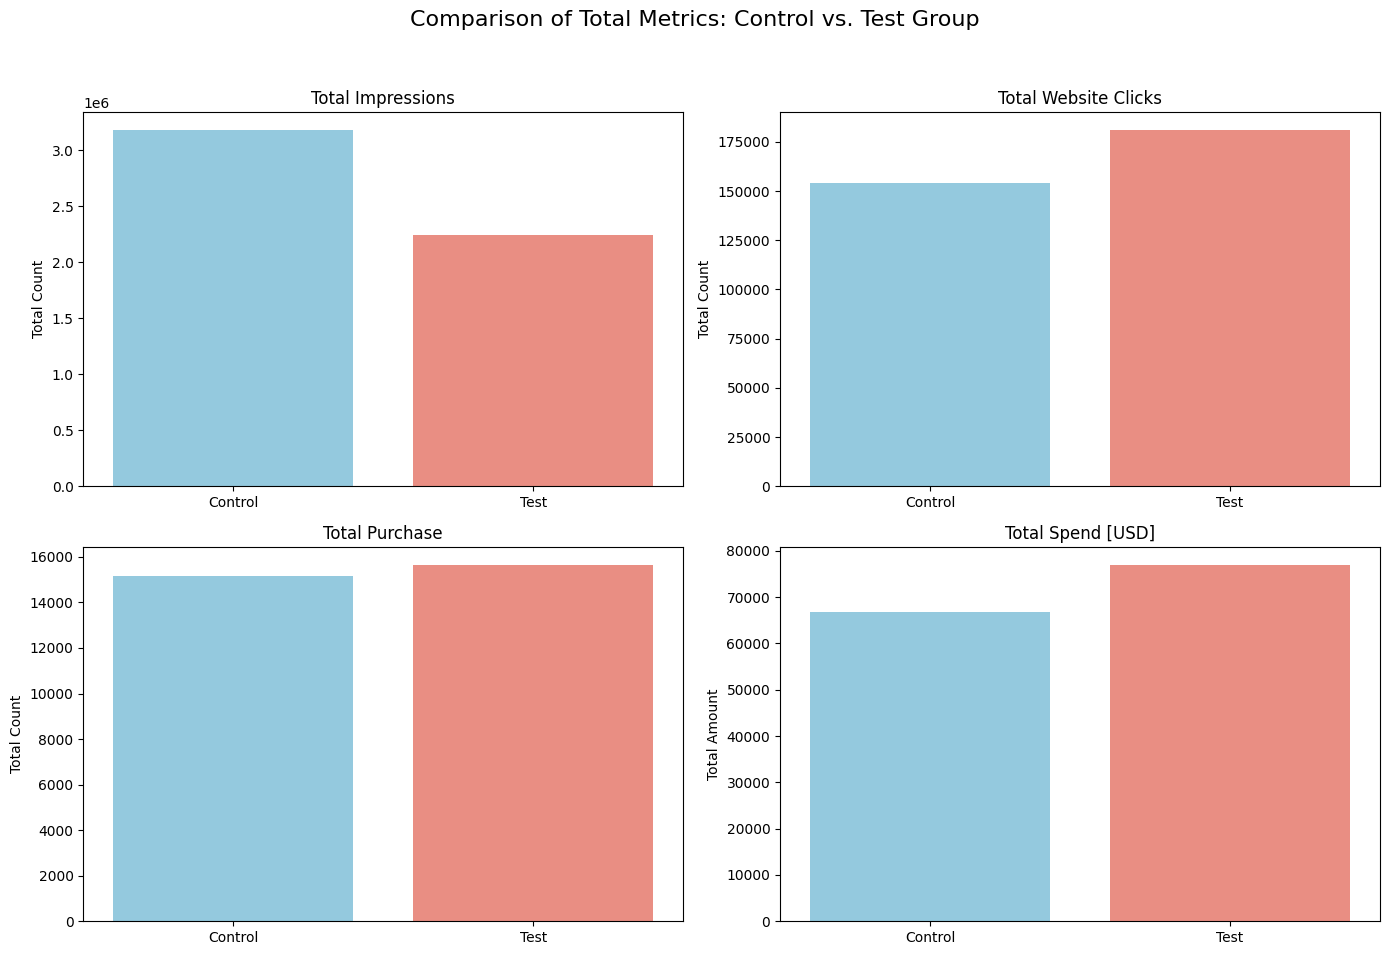

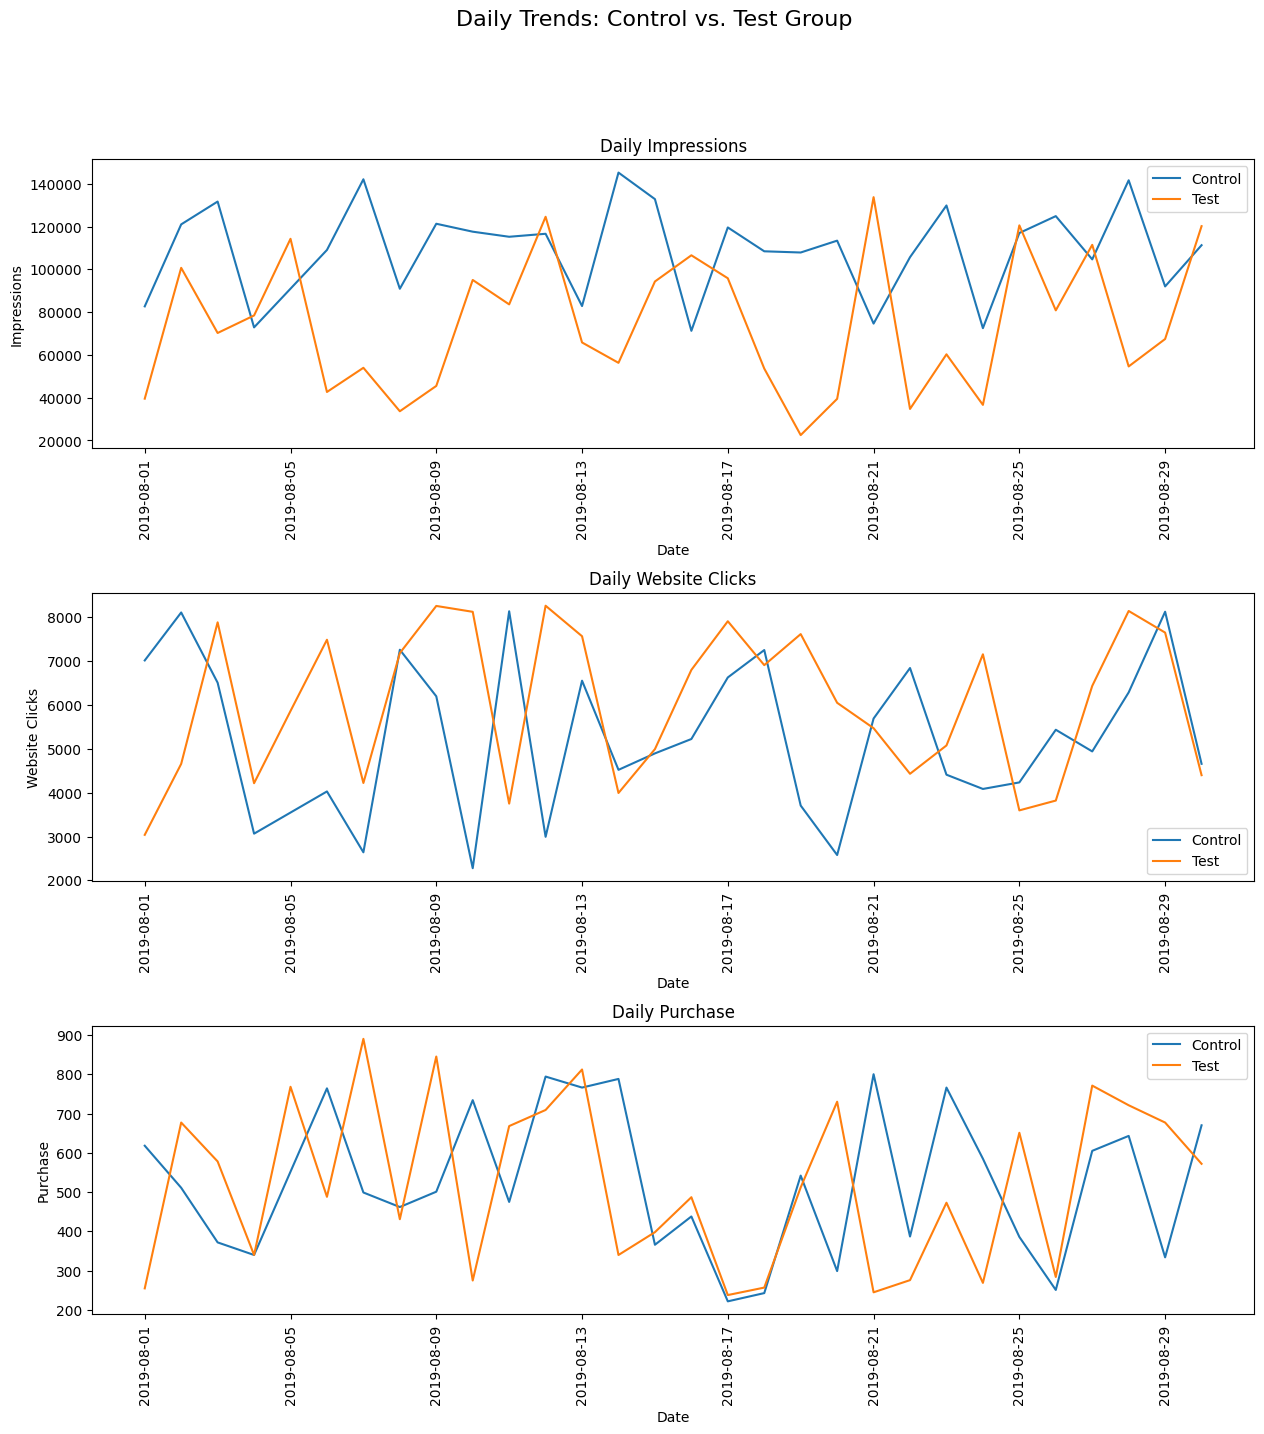

In [15]:
# Convert 'Date' column to datetime objects
control_df['Date'] = pd.to_datetime(control_df['Date'], format='%d.%m.%Y')
test_df['Date'] = pd.to_datetime(test_df['Date'], format='%d.%m.%Y')

# Sort data by date
control_df = control_df.sort_values(by='Date')
test_df = test_df.sort_values(by='Date')

# Display descriptive statistics for numerical columns
print("--- Control Group Descriptive Statistics ---")
print(control_df.describe())

print("\n--- Test Group Descriptive Statistics ---")
print(test_df.describe())

# Create a combined DataFrame for easier plotting of total sums
total_sums_df = pd.DataFrame({
    'Metric': ['Impressions', 'Reach', 'Website_Clicks', 'Searches', 'View_Content', 'Add_to_Cart', 'Purchase', 'Spend'],
    'Control': [control_df['Impressions'].sum(), control_df['Reach'].sum(), control_df['Website_Clicks'].sum(),
                control_df['Searches'].sum(), control_df['View_Content'].sum(), control_df['Add_to_Cart'].sum(),
                control_df['Purchase'].sum(), control_df['Spend'].sum()],
    'Test': [test_df['Impressions'].sum(), test_df['Reach'].sum(), test_df['Website_Clicks'].sum(),
             test_df['Searches'].sum(), test_df['View_Content'].sum(), test_df['Add_to_Cart'].sum(),
             test_df['Purchase'].sum(), test_df['Spend'].sum()]
})

# Plotting total sums for key metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparison of Total Metrics: Control vs. Test Group', fontsize=16)

# Impressions
sns.barplot(x=['Control', 'Test'], y=[total_sums_df[total_sums_df['Metric'] == 'Impressions']['Control'].values[0],
                                     total_sums_df[total_sums_df['Metric'] == 'Impressions']['Test'].values[0]],
            ax=axes[0, 0],palette=['skyblue', 'salmon'])
axes[0, 0].set_title('Total Impressions')
axes[0, 0].set_ylabel('Total Count')

# Website Clicks
sns.barplot(x=['Control', 'Test'], y=[total_sums_df[total_sums_df['Metric'] == 'Website_Clicks']['Control'].values[0],
                                     total_sums_df[total_sums_df['Metric'] == 'Website_Clicks']['Test'].values[0]],
            ax=axes[0, 1],palette=['skyblue', 'salmon'])
axes[0, 1].set_title('Total Website Clicks')
axes[0, 1].set_ylabel('Total Count')

# Purchase
sns.barplot(x=['Control', 'Test'], y=[total_sums_df[total_sums_df['Metric'] == 'Purchase']['Control'].values[0],
                                     total_sums_df[total_sums_df['Metric'] == 'Purchase']['Test'].values[0]],
            ax=axes[1, 0],palette=['skyblue', 'salmon'])
axes[1, 0].set_title('Total Purchase')
axes[1, 0].set_ylabel('Total Count')

# Spend
sns.barplot(x=['Control', 'Test'], y=[total_sums_df[total_sums_df['Metric'] == 'Spend']['Control'].values[0],
                                     total_sums_df[total_sums_df['Metric'] == 'Spend']['Test'].values[0]],
            ax=axes[1, 1],palette=['skyblue', 'salmon'])
axes[1, 1].set_title('Total Spend [USD]')
axes[1, 1].set_ylabel('Total Amount')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Plotting daily trends for key metrics
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Daily Trends: Control vs. Test Group', fontsize=16)

# Daily Impressions
sns.lineplot(data=control_df, x='Date', y='Impressions', label='Control', ax=axes[0])
sns.lineplot(data=test_df, x='Date', y='Impressions', label='Test', ax=axes[0])
axes[0].set_title('Daily Impressions')
axes[0].set_ylabel('Impressions')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend()

# Daily Website Clicks
sns.lineplot(data=control_df, x='Date', y='Website_Clicks', label='Control', ax=axes[1])
sns.lineplot(data=test_df, x='Date', y='Website_Clicks', label='Test', ax=axes[1])
axes[1].set_title('Daily Website Clicks')
axes[1].set_ylabel('Website Clicks')
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend()

# Daily Purchase
sns.lineplot(data=control_df, x='Date', y='Purchase', label='Control', ax=axes[2])
sns.lineplot(data=test_df, x='Date', y='Purchase', label='Test', ax=axes[2])
axes[2].set_title('Daily Purchase')
axes[2].set_ylabel('Purchase')
axes[2].tick_params(axis='x', rotation=90)
axes[2].legend()

plt.subplots_adjust(hspace=0.5)
plt.show()

In [16]:
# Calculate sums for relevant metrics
metrics = ['Impressions', 'Reach', 'Website_Clicks', 'Searches', 'View_Content', 'Add_to_Cart', 'Purchase']

control_sums = control_df[metrics].sum()
test_sums = test_df[metrics].sum()

print("\nControl Group Sums:")
print(control_sums)
print("\nTest Group Sums:")
print(test_sums)

# Website Click-Through Rate (CTR): Clicks / Impressions
control_ctr = (control_sums['Website_Clicks'] / control_sums['Impressions']) * 100
test_ctr = (test_sums['Website_Clicks'] / test_sums['Impressions']) * 100

# View Content Rate: View Content / Website Clicks
control_view_content_rate = (control_sums['View_Content'] / control_sums['Website_Clicks']) * 100
test_view_content_rate = (test_sums['View_Content'] / test_sums['Website_Clicks']) * 100

# Add to Cart Rate: Add to Cart / View Content
control_add_to_cart_rate = (control_sums['Add_to_Cart'] / control_sums['View_Content']) * 100
test_add_to_cart_rate = (test_sums['Add_to_Cart'] / test_sums['View_Content']) * 100

# Purchase Rate: Purchase / Add to Cart
control_purchase_rate = (control_sums['Purchase'] / control_sums['Add_to_Cart']) * 100
test_purchase_rate = (test_sums['Purchase'] / test_sums['Add_to_Cart']) * 100

# Overall Conversion Rate (Purchase / Impressions)
control_overall_conversion_rate = (control_sums['Purchase'] / control_sums['Impressions']) * 100
test_overall_conversion_rate = (test_sums['Purchase'] / test_sums['Impressions']) * 100

print(f"\n--- Key Performance Indicators ---")
print(f"Website Click-Through Rate (CTR):")
print(f"  Control: {control_ctr:.2f}%")
print(f"  Test:    {test_ctr:.2f}%")

print(f"\nView Content Rate (View Content / Website Clicks):")
print(f"  Control: {control_view_content_rate:.2f}%")
print(f"  Test:    {test_view_content_rate:.2f}%")

print(f"\nAdd to Cart Rate (Add to Cart / View Content):")
print(f"  Control: {control_add_to_cart_rate:.2f}%")
print(f"  Test:    {test_add_to_cart_rate:.2f}%")

print(f"\nPurchase Rate (Purchase / Add to Cart):")
print(f"  Control: {control_purchase_rate:.2f}%")
print(f"  Test:    {test_purchase_rate:.2f}%")

print(f"\nOverall Conversion Rate (Purchase / Impressions):")
print(f"  Control: {control_overall_conversion_rate:.2f}%")
print(f"  Test:    {test_overall_conversion_rate:.2f}%")


Control Group Sums:
Impressions       3177233.0
Reach             2576503.0
Website_Clicks     154303.0
Searches            64418.0
View_Content        56370.0
Add_to_Cart         37700.0
Purchase            15161.0
dtype: float64

Test Group Sums:
Impressions       2237544
Reach             1604747
Website_Clicks     180970
Searches            72569
View_Content        55740
Add_to_Cart         26446
Purchase            15637
dtype: int64

--- Key Performance Indicators ---
Website Click-Through Rate (CTR):
  Control: 4.86%
  Test:    8.09%

View Content Rate (View Content / Website Clicks):
  Control: 36.53%
  Test:    30.80%

Add to Cart Rate (Add to Cart / View Content):
  Control: 66.88%
  Test:    47.45%

Purchase Rate (Purchase / Add to Cart):
  Control: 40.21%
  Test:    59.13%

Overall Conversion Rate (Purchase / Impressions):
  Control: 0.48%
  Test:    0.70%


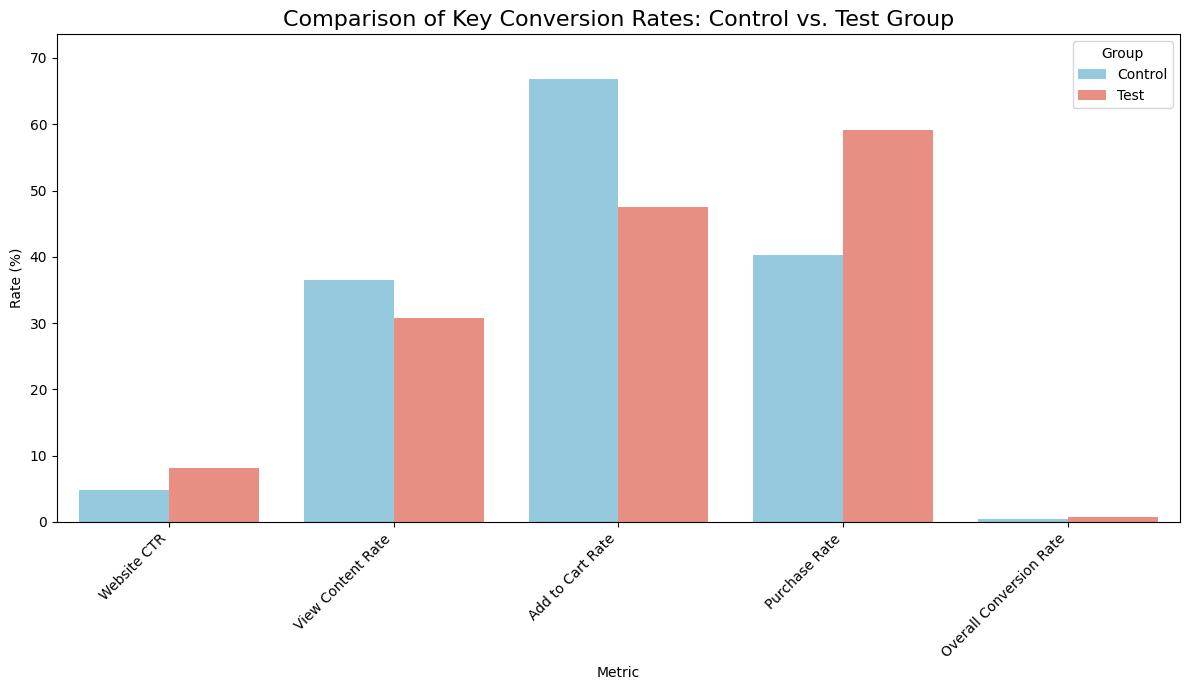

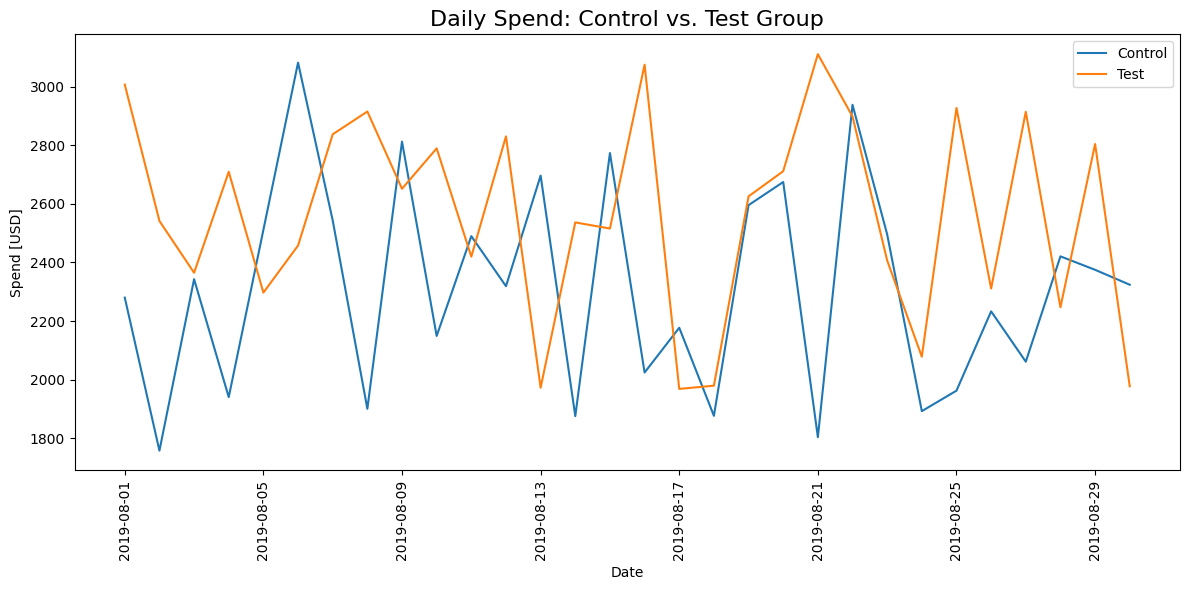

In [17]:
conversion_rates_df = pd.DataFrame({
    'Metric': ['Website CTR', 'View Content Rate', 'Add to Cart Rate', 'Purchase Rate', 'Overall Conversion Rate'],
    'Control': [control_ctr, control_view_content_rate, control_add_to_cart_rate, control_purchase_rate, control_overall_conversion_rate],
    'Test': [test_ctr, test_view_content_rate, test_add_to_cart_rate, test_purchase_rate, test_overall_conversion_rate]
})

# Reshape for easier plotting with seaborn
conversion_rates_melted = conversion_rates_df.melt(id_vars='Metric', var_name='Group', value_name='Rate (%)')

# Plotting conversion rates
plt.figure(figsize=(12, 7))
sns.barplot(data=conversion_rates_melted, x='Metric', y='Rate (%)', hue='Group', palette=['skyblue', 'salmon'])
plt.title('Comparison of Key Conversion Rates: Control vs. Test Group', fontsize=16)
plt.ylabel('Rate (%)')
plt.xlabel('Metric')
plt.ylim(0, conversion_rates_melted['Rate (%)'].max() * 1.1) # Add some padding to the y-axis
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plotting daily spend
plt.figure(figsize=(12, 6))
sns.lineplot(data=control_df, x='Date', y='Spend', label='Control')
sns.lineplot(data=test_df, x='Date', y='Spend', label='Test')
plt.title('Daily Spend: Control vs. Test Group', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Spend [USD]')
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.tight_layout()
plt.show()